In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [83]:
file_path = r"C:\Users\meena\OneDrive\INT 234 3rd yr\money management survey .csv"
df = pd.read_csv(file_path, encoding="latin-1")
print("Dataset Shape:", df.shape)
print(df.info())
print(df.isnull().sum())

Dataset Shape: (515, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Age                                                                    515 non-null    object
 1   Gender                                                                 515 non-null    object
 2   Current Status 

Current_Status                                        515 non-null    object
 3   Monthly_Income_INR                                                     515 non-null    object
 4   Monthly_Budget_Planned                                                 515 non-null    object
 5    Total_Monthly_Expenditure_INR                                         515 non-null    int64 
 6   Monthly_Savings_INR                                                    51

In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace("\n", " ", regex=True)
    .str.replace("  ", " ", regex=True)
)

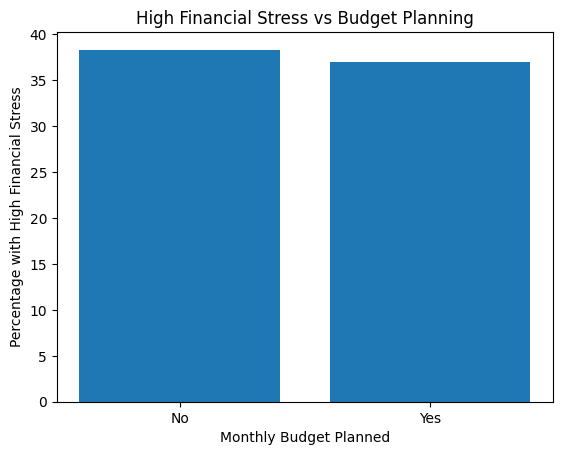

In [85]:
# OBJECTIVE 1 & 2:
# HIGH FINANCIAL STRESS VS BUDGET PLANNING
df["High_Stress"] = df["Financial_Stress_Rating"].apply(lambda x: 1 if x >= 7 else 0)

stress_risk = df.groupby("Monthly_Budget_Planned")["High_Stress"].mean() * 100

plt.figure()
plt.bar(stress_risk.index.astype(str), stress_risk.values)
plt.xlabel("Monthly Budget Planned")
plt.ylabel("Percentage with High Financial Stress")
plt.title("High Financial Stress vs Budget Planning")
plt.show()

C:\Users\meena\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


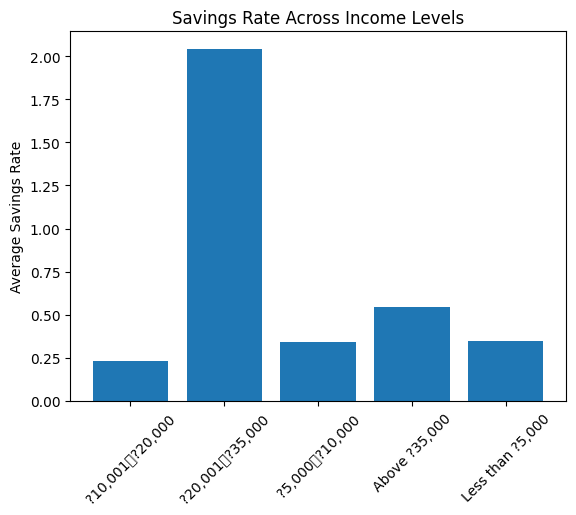

In [86]:
# OBJECTIVE 3:
# INCOME LEVEL VS SAVINGS RATE
df = df[df["Total_Monthly_Expenditure_INR"] > 0]

df["Savings_Rate"] = (
    df["Monthly_Savings_INR"] / df["Total_Monthly_Expenditure_INR"]
)

income_savings = df.groupby("Monthly_Income_INR")["Savings_Rate"].mean()

plt.figure()
plt.bar(income_savings.index.astype(str), income_savings.values)
plt.xticks(rotation=45)
plt.ylabel("Average Savings Rate")
plt.title("Savings Rate Across Income Levels")
plt.show()

C:\Users\meena\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


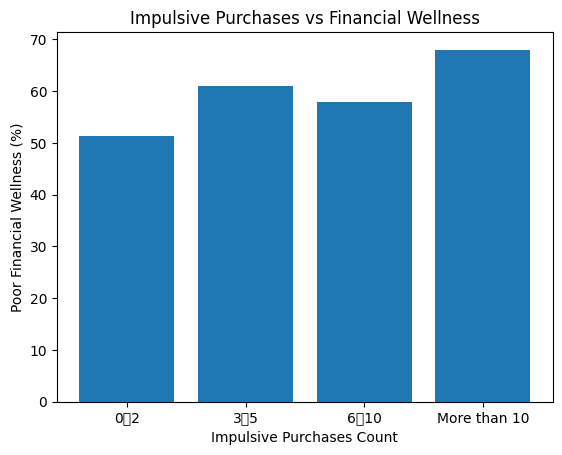

In [87]:
# OBJECTIVE 4:
# IMPULSIVE PURCHASES VS FINANCIAL WELLNESS

df["Poor_Wellness"] = df["Overall_Financial_Wellness_Rating"].apply(
    lambda x: 1 if x <= 6 else 0
)
wellness_impulse = (
    df.groupby("Impulsive_Purchases_Count")["Poor_Wellness"].mean() * 100
)
plt.figure()
plt.bar(wellness_impulse.index.astype(str), wellness_impulse.values)
plt.xlabel("Impulsive Purchases Count")
plt.ylabel("Poor Financial Wellness (%)")
plt.title("Impulsive Purchases vs Financial Wellness")
plt.show()

In [88]:
# FEATURE SELECTION FOR ML MODELS
features = [
    "Total_Monthly_Expenditure_INR",
    "Monthly_Savings_INR",
    "Financial_Stress_Rating",
    "Financial_Knowledge_Rating",
    "Savings_Consistency_Rating"
]

X = df[features]
y = df["Monthly_Budget_Planned"].map({"Yes": 1, "No": 0})

# TRAIN TEST SPLIT & SCALING

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
# OBJECTIVE 5:
# LOGISTIC REGRESSION
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLogistic Regression Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Metrics
Accuracy: 0.751937984496124
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.75      1.00      0.86        97

    accuracy                           0.75       129
   macro avg       0.38      0.50      0.43       129
weighted avg       0.57      0.75      0.65       129



C:\Users\meena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\meena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\meena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [90]:
# OBJECTIVE 6:
# KNN CLASSIFIER
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\nKNN Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Metrics
Accuracy: 0.6976744186046512
              precision    recall  f1-score   support

           0       0.11      0.03      0.05        32
           1       0.74      0.92      0.82        97

    accuracy                           0.70       129
   macro avg       0.43      0.47      0.43       129
weighted avg       0.59      0.70      0.63       129



In [91]:
# OBJECTIVE 7:
# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Metrics
Accuracy: 0.7131782945736435
              precision    recall  f1-score   support

           0       0.22      0.06      0.10        32
           1       0.75      0.93      0.83        97

    accuracy                           0.71       129
   macro avg       0.49      0.50      0.46       129
weighted avg       0.62      0.71      0.65       129



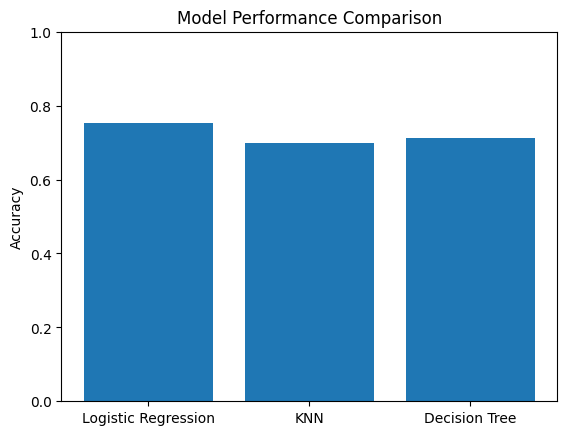

In [98]:
# FINAL MODEL PERFORMANCE COMPARISON
model_names = ["Logistic Regression", "KNN", "Decision Tree"]
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt)
]

plt.figure()
plt.bar(model_names, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()

C:\Users\meena\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


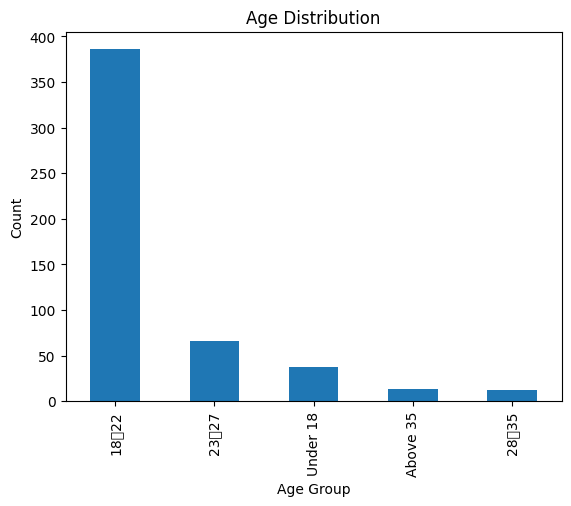

In [92]:
# AGE DISTRIBUTION 
plt.figure()
df["Age"].value_counts().plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

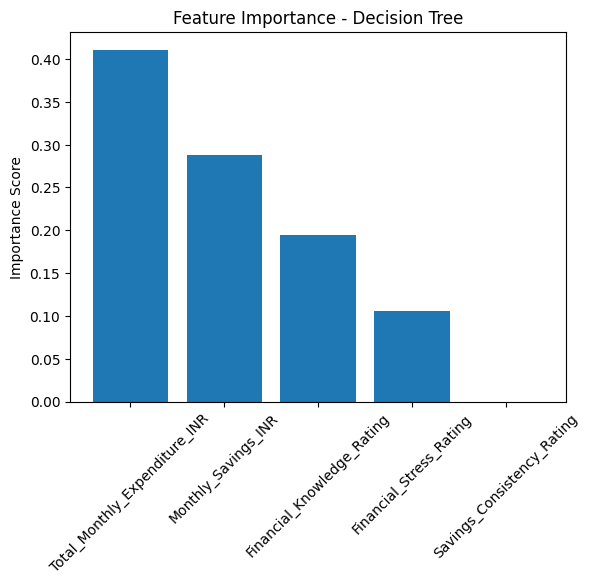

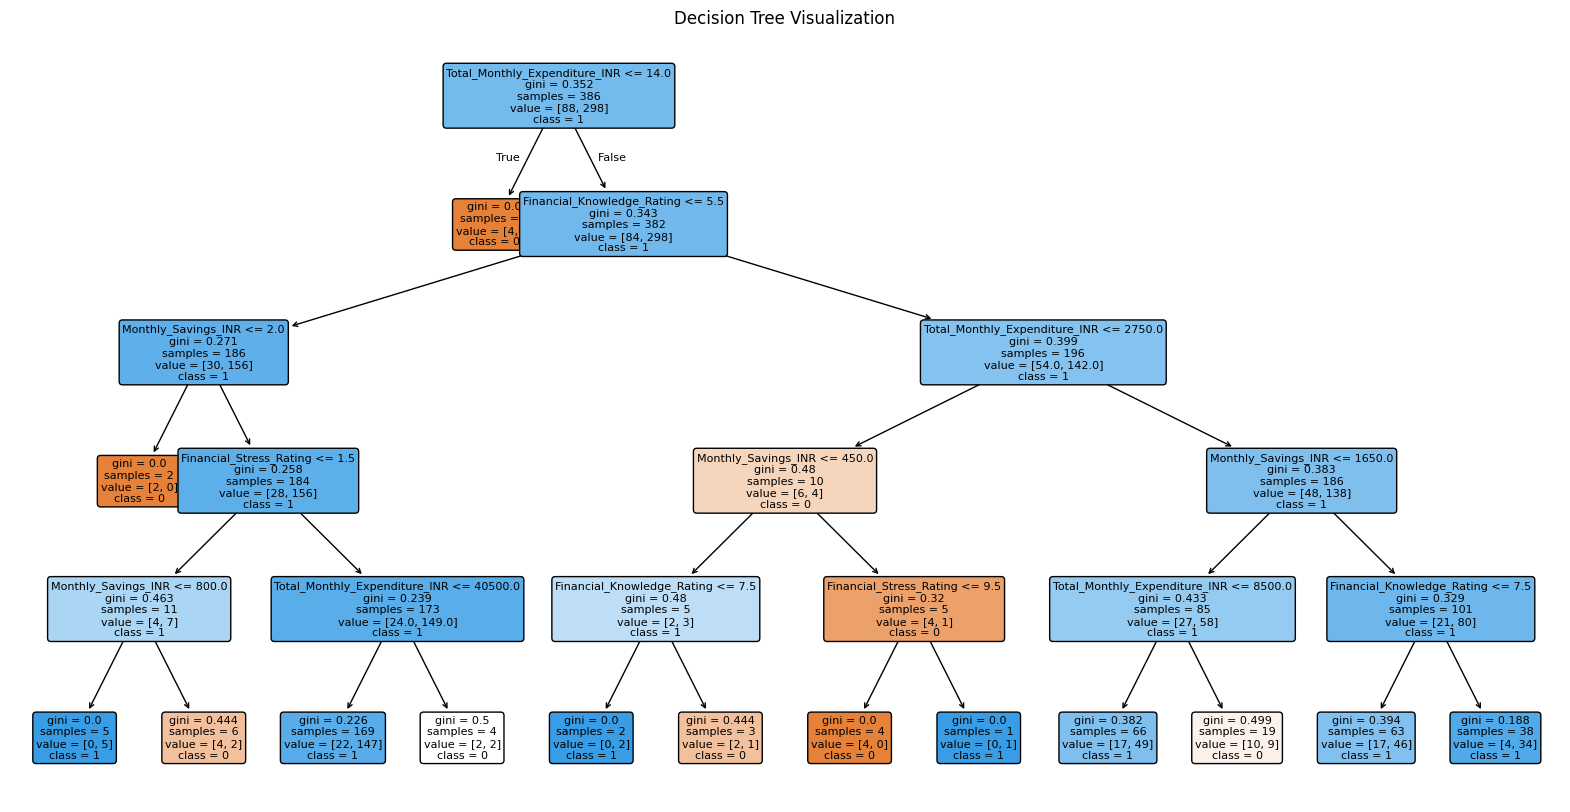

In [93]:
# OBJECTIVE 8:
# FEATURE IMPORTANCE & TREE VISUALIZATION
feature_importance = pd.Series(
    dt.feature_importances_,
    index=features
).sort_values(ascending=False)

plt.figure()
plt.bar(feature_importance.index, feature_importance.values)
plt.xticks(rotation=45)
plt.ylabel("Importance Score")
plt.title("Feature Importance - Decision Tree")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=features,
    class_names=dt.classes_.astype(str),
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()

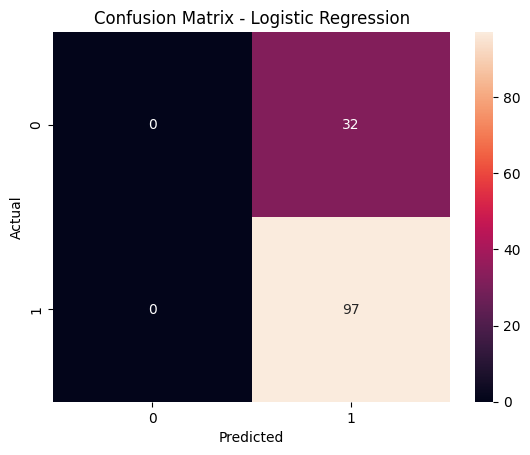

In [99]:
#confusion matrix based on logistic regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [94]:
# OBJECTIVE 9:
# K-MEANS CLUSTERING
kmeans_features = [
    "Total_Monthly_Expenditure_INR",
    "Monthly_Savings_INR",
    "Financial_Stress_Rating",
    "Overall_Financial_Wellness_Rating"
]

X_cluster = df[kmeans_features]
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_cluster_scaled)

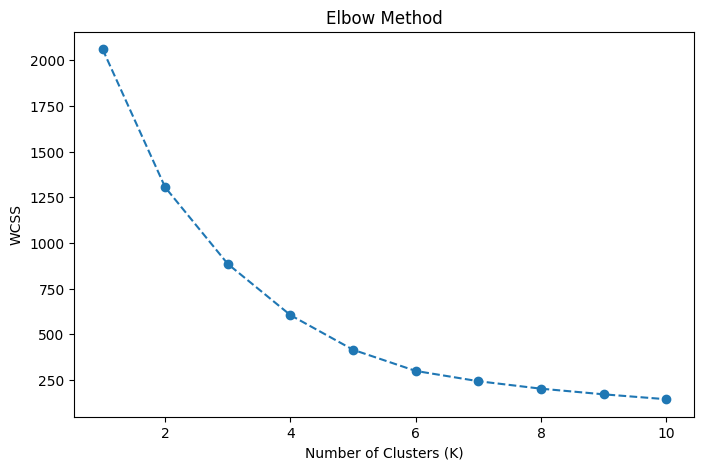

In [95]:
# OBJECTIVE 10:
# ELBOW METHOD
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cluster_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [96]:
# OBJECTIVE 11:
# CLUSTER INTERPRETATION
print("\nCluster Summary:")
print(df.groupby("Cluster")[kmeans_features].mean())


Cluster Summary:
         Total_Monthly_Expenditure_INR  Monthly_Savings_INR  \
Cluster                                                       
0                         1.002198e+04         4.264834e+03   
1                         8.500000e+06         3.500000e+06   
2                         7.721155e+03         1.987649e+03   

         Financial_Stress_Rating  Overall_Financial_Wellness_Rating  
Cluster                                                              
0                       6.840125                           6.683386  
1                       3.500000                           6.500000  
2                       3.221649                           4.293814  



PCA Explained Variance Ratio: [0.39332965 0.31797282]
Total Variance Explained: 0.7113024694676683


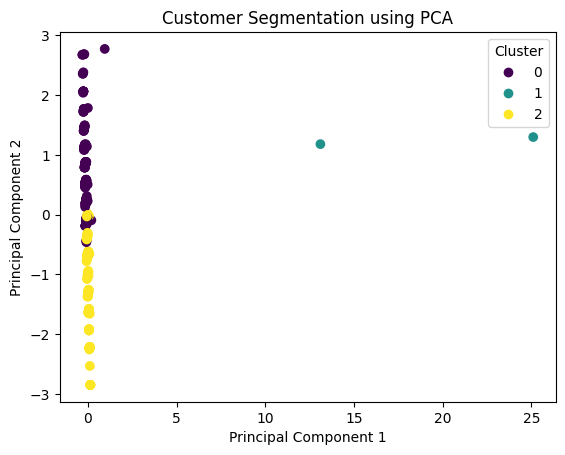

In [97]:
#Objective 12:
#To interpret and visualize customer financial segments using Principal Component Analysis (PCA).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())

plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"])
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using PCA")
plt.show()